In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import electrode2currentmap as e2cm
import effectivecurrent2brightness as ec2b
from scipy import interpolate
from utils import TimeSeries
import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pulse2percept as p2p
import skimage.io as sio
import skimage.color as sic
import skimage.transform as sit

Call to deprecated function __init__.
Call to deprecated function mov2npy.
Call to deprecated function micron2deg. Use p2p.retina.ret2dva instead.
Call to deprecated function deg2micron. Use p2p.retina.dva2ret instead.
Call to deprecated function savemoviefiles. Use p2p.files.save_video instead.
Call to deprecated function npy2movie. Use p2p.files.save_video instead.
Call to deprecated function scale. Use p2p.stimuli.image2pulsetrain instead.
Call to deprecated function Movie2Pulsetrain. Use p2p.stimuli.video2pulsetrain instead.
Call to deprecated function retinalmovie2electrodtimeseries.


In [4]:
r = e2cm.Retina(axon_map='retina_s25_1700by2800.npz',
                sampling=25, ylo=-1700, yhi=1700, xlo=-2800, xhi=2800, axon_lambda=2)

Can't find file retina_s25_1700by2800.npz, generating


In [5]:
xlist=[]
ylist=[]
rlist=[]
e_spacing=525

for x in np.arange(-2362, 2364, e_spacing):
    for y in np.arange(-1312, 1314, e_spacing):
        xlist.append(x)
        ylist.append(y)
        rlist.append(100)

e_all = e2cm.ElectrodeArray(rlist,xlist,ylist)

e_rf=[]
for e in e_all.electrodes:
    e_rf.append(e2cm.receptive_field(e, r.gridx, r.gridy,e_spacing))

In [7]:
letter = 'A'
invert = True

In [8]:
img = sio.imread('../../../pulse2percept/examples/notebooks/letters/%s.jpg' % letter)
img = img[25:175, 25:225]
img.shape

(150, 200)

In [9]:
frames = sic.gray2rgb(img)
frames = sit.resize(frames, r.gridx.shape)
if invert:
    frames = 1.0 - frames
frames = np.flipud(frames)
frames.min(), frames.max(), frames.dtype, frames.shape

(0.0, 1.0, dtype('float64'), (136, 224, 3))

In [10]:
if invert:
    fstr = '%s-invert-' % letter
else:
    fstr = '%s-' % letter

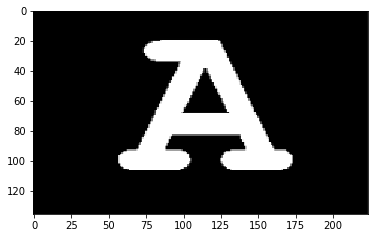

In [11]:
plt.imshow(np.flipud(frames[..., 0]), cmap='gray')
plt.savefig(fstr + 'stim.jpg')

In [13]:
i = 0
j = 0
pt=[]
for rf in e_rf:
    rflum = e2cm.retinalmovie2electrodtimeseries(rf, frames[i:i+r.gridx.shape[0], j:j+r.gridx.shape[1]], fps=6)
    #plt.plot(rflum)
    ptrain = e2cm.Movie2Pulsetrain(rflum)
    #plt.plot(ptrain.data)
    pt.append(ptrain)


In [14]:
temporal_model = ec2b.TemporalModel()


In [15]:
ecs, cs  = r.electrode_ecs(e_all)

In [16]:
brightness_movie = ec2b.pulse2percept(temporal_model, ecs, r, pt)

In [17]:
mov = p2p.utils.TimeSeries(brightness_movie.tsample, brightness_movie.data)

In [18]:
frame = p2p.get_brightest_frame(mov)

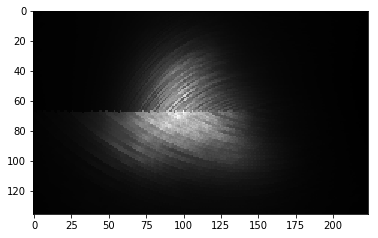

In [19]:
plt.imshow(np.flipud(frame.data), cmap='gray')
plt.savefig(fstr + 'percept.jpg')